In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv("Barguna.csv", delimiter=',', header=None, skiprows=1, 
                 names=['TTYName','PaymentDate','PaidAmount'])

In [3]:
## Cleaning up the data
#df = df.drop('TTYName', 1)
df.columns=["Area","Date","Sales"]
df.head()

,Area,Date,Sales
0,Barguna,202006,3726445
1,Barguna,202005,1637392
2,Barguna,202004,462526
3,Barguna,202003,2288558
4,Barguna,202002,3774500


In [4]:
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

In [5]:
df

,Area,Date,Sales
0,Barguna,2020-06-01,3726445
1,Barguna,2020-05-01,1637392
2,Barguna,2020-04-01,462526
3,Barguna,2020-03-01,2288558
4,Barguna,2020-02-01,3774500
...,...,...,...
121,Barguna,2010-05-01,465000
122,Barguna,2010-04-01,232500
123,Barguna,2010-03-01,190000
124,Barguna,2010-02-01,85000


In [6]:
df.sort_values(by='Date',inplace=True)

In [7]:
df.head(20)

,Area,Date,Sales
125,Barguna,2010-01-01,47000
124,Barguna,2010-02-01,85000
123,Barguna,2010-03-01,190000
122,Barguna,2010-04-01,232500
121,Barguna,2010-05-01,465000
120,Barguna,2010-06-01,284000
119,Barguna,2010-07-01,170000
118,Barguna,2010-08-01,222000
117,Barguna,2010-09-01,110000
116,Barguna,2010-10-01,958000


<Figure size 1440x1440 with 0 Axes>

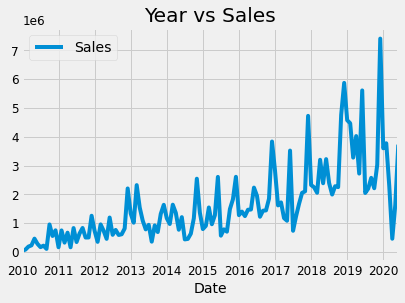

In [8]:
plt.figure(figsize=(20,20))
df.plot(x='Date',y='Sales')
plt.title('Year vs Sales')
plt.show()

In [9]:
df.set_index('Date',inplace=True)

In [10]:
y = df['Sales'].resample('MS').mean()

In [11]:
y

Date
2010-01-01      47000
2010-02-01      85000
2010-03-01     190000
2010-04-01     232500
2010-05-01     465000
               ...   
2020-02-01    3774500
2020-03-01    2288558
2020-04-01     462526
2020-05-01    1637392
2020-06-01    3726445
Freq: MS, Name: Sales, Length: 126, dtype: int64

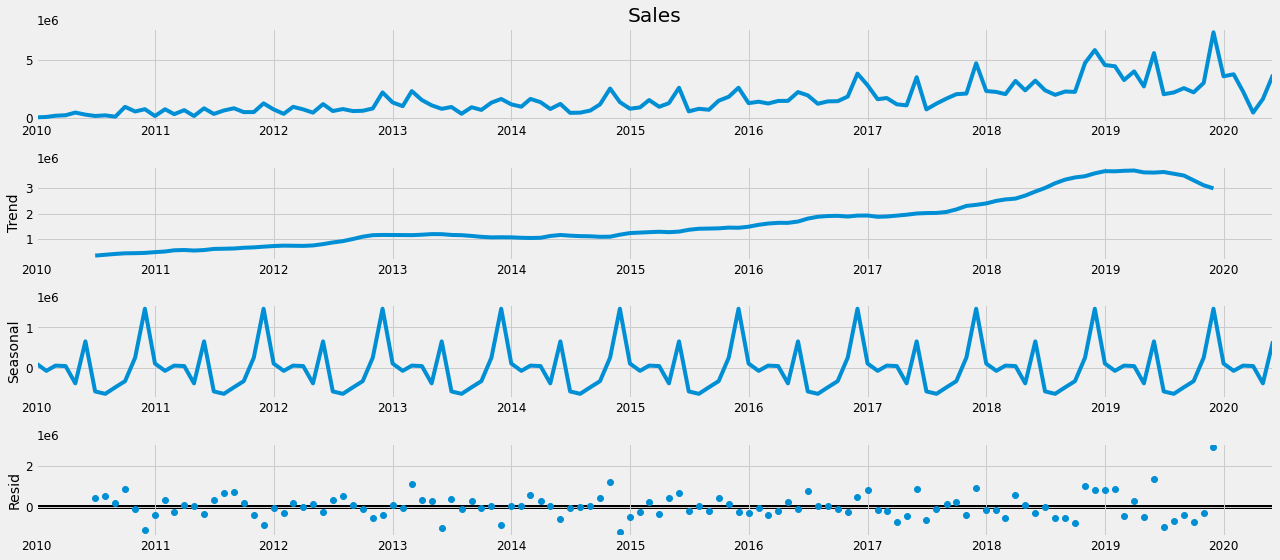

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [13]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [14]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3995.672555717206
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3571.2942780848684
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3421.9186683792454
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3067.1893074746017
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3451.295218891064
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3399.466293130371
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3094.003728393311
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3066.3264233973914
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3908.020734343392
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3510.358067937284
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3386.10536933652
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3025.9303907659137
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3550.7803627567555
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3485.4349939184776
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3081.578528182628
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3024.123118456656
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3800.870509458869
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3435.3353645634747
ARI

In [15]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4878      0.101     -4.851      0.000      -0.685      -0.291
ar.S.L12      -0.4466      0.106     -4.220      0.000      -0.654      -0.239
sigma2      6.969e+11   4.59e-14   1.52e+25      0.000    6.97e+11    6.97e+11


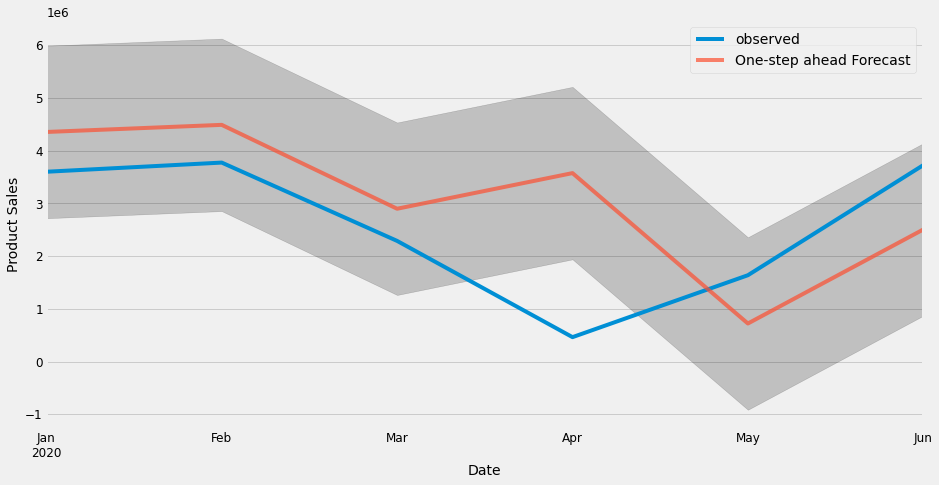

In [16]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Product Sales')
plt.legend()
plt.show()

In [17]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2245458315518.97


In [18]:
y_forecasted

Date
2020-01-01    4.355321e+06
2020-02-01    4.490497e+06
2020-03-01    2.898862e+06
2020-04-01    3.574993e+06
2020-05-01    7.212680e+05
2020-06-01    2.505252e+06
Freq: MS, dtype: float64

In [19]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1498485.34


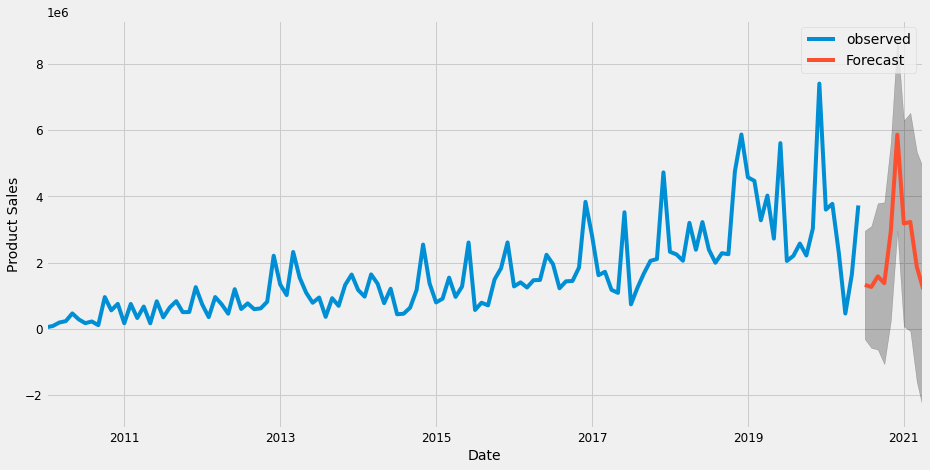

In [20]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Product Sales')
plt.legend()
plt.show()

In [22]:
pred_uc
pred_ci.head(130)

,lower Sales,upper Sales
2020-07-01,-3.094683e+05,2.963002e+06
2020-08-01,-5.746310e+05,3.102083e+06
2020-09-01,-6.259197e+05,3.794991e+06
2020-10-01,-1.064281e+06,3.819340e+06
2020-11-01,2.532174e+05,5.634529e+06
2020-12-01,2.962997e+06,8.765302e+06
2021-01-01,7.492310e+04,6.285263e+06
2021-02-01,-6.412540e+04,6.521852e+06
2021-03-01,-1.598153e+06,5.346485e+06
2021-04-01,-2.444524e+06,4.839593e+06


In [23]:
df2 = pred_ci.head(130)

In [24]:
df

,lower Sales,upper Sales
2020-07-01,-3.094683e+05,2.963002e+06
2020-08-01,-5.746310e+05,3.102083e+06
2020-09-01,-6.259197e+05,3.794991e+06
2020-10-01,-1.064281e+06,3.819340e+06
2020-11-01,2.532174e+05,5.634529e+06
2020-12-01,2.962997e+06,8.765302e+06
2021-01-01,7.492310e+04,6.285263e+06
2021-02-01,-6.412540e+04,6.521852e+06
2021-03-01,-1.598153e+06,5.346485e+06
2021-04-01,-2.444524e+06,4.839593e+06
